<a id='start'></a>

# Исследование продаж видеоигр и выявление закономерностей, определяющих успешность этих игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:** Провести анализ данных продаж видеоигр для различных платформ по различным регионам, чтобы определить потенциально прибыльное направление и сформулировать рекомендации для будущих рекламных компаний.

**Задачи исследования:**
1. Провести предварительное изучение данных.
2. Подготовить данные: обработать дубликаты, пропущенные значений.
3. Исследовать данные: определенить актуальный период для анализа, наиболее популярные платформы, определить от чего зависят продажи игр.
4. Составить для кажого региона портрет типичного пользователя: описать наиболее популярные платформы, жанры и возрастной рейтинг игр.
5. Сформулировать и проверить по итогам исследования некоторые гипотезы.
6. Сформулировать вывод и рекомендации.

**Разделим иследование на несколько частей:**

***1. Изучение общей информации***
1. [Импорт библиотек и чтение файла](#libraries_reading)
2. [Первые замечания после знакомства с данными](#first_conclusions)

***2. Подготовка данных***
1. [Изменение типов данных](#type)
2. [Изучение пропусков](#gaps)
3. [Работа с дубликатами](#duplicates)

***3. Исследовательский анализ данных***
1. [Количество выпущенных игр в разные года](#games_yearly)
2. [Определение актуального периода](#actual_years)
3. [Определение наиболее популярных платформ](#actual_platforms)
4. [Изучение наиболее популярных платформ по годам](#popular_platforms)
5. [Изучение влияния отзывов пользователей и критиков на продажи игр](#scores)
6. [Определение наиболее популярных жанров](#genres)

***4. Портрет пользователя каждого региона***
1. [Топ-5 платформ для каждого региона по продажам игр для них](#region_platforms)
2. [Топ-5 платформ для каждого региона по жанрам](#region_genres)
3. [Исследование зависимости между рейтингом ESRB и продажами](#rating)

***5. Проверка гипотез***
1. [Первая гипотеза](#hyp_1)
2. [Вторая гипотеза](#hyp_2)

***6. Заключение***
1. [Выводы](#conclusions)
2. [Рекомендации](#recomms)

### Открываем файл с данными и изучаем общую информацию. 

Импорт библиотек и чтение файла <a id='libraries_reading'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

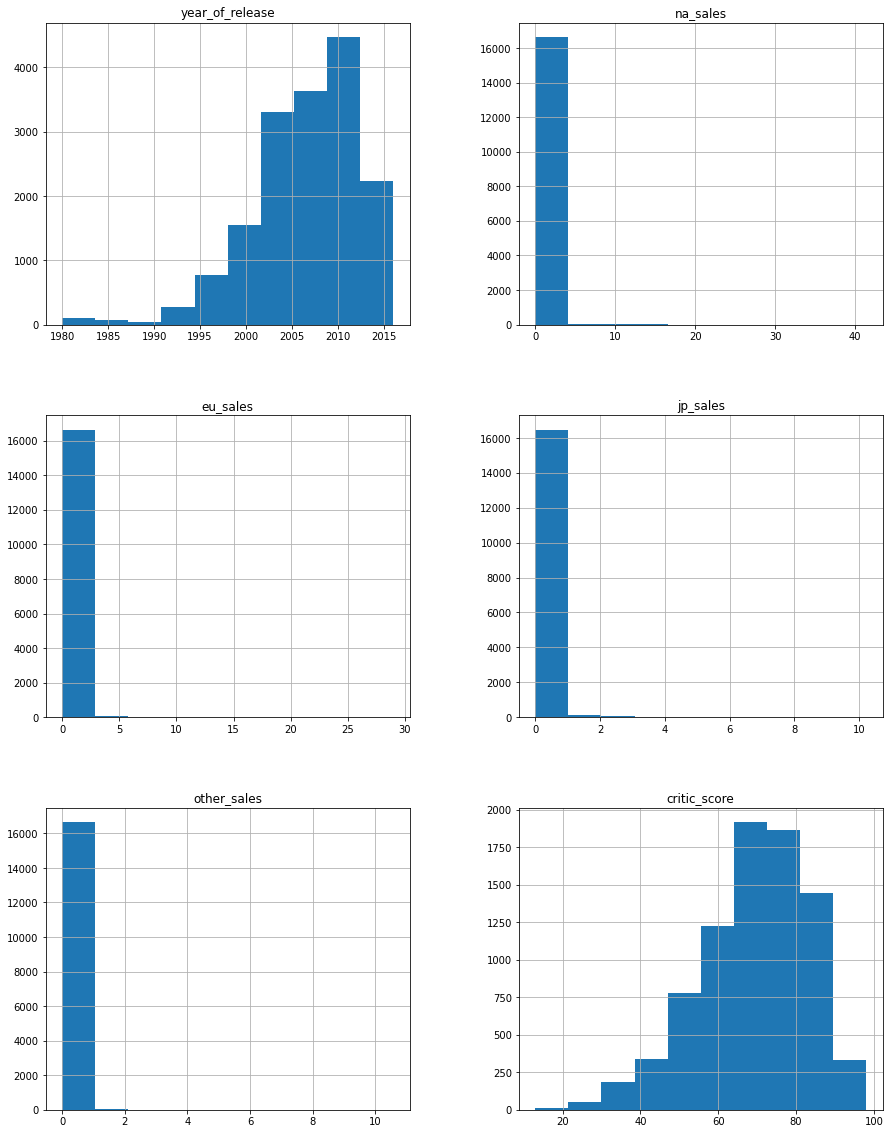

In [5]:
data.hist(figsize=(15, 20))

Некоторые замечания после первичного знакомства с данными:<br><br> <a id='first_conclusions'></a>
Столбец name:<br>
Пропусков почти нет, тип данных подходящий<br><br>
Столбец platform:<br>
Пропусков нет, тип данных подходящий<br><br>
Столбец year_of_release:<br>
Есть незначительное количество пропусков, тип данных следовало бы поменять на int<br><br>
Столбец na_sales:<br>
Пропусков нет, тип данных подходящий<br><br>
Столбец eu_sales:<br>
Пропусков нет, тип данных подходящий<br><br>
Столбец jp_sales:<br>
Пропусков нет, тип данных подходящий<br><br>
Столбец other_sales:<br>
Пропусков нет, тип данных подходящий<br><br>
Столбец critic_score:<br>
Отсутствует около половины данных, тип данных подходящий<br><br>
Столбец user_score:<br>
Значительное количество данных пропущено, тип следует поменять на float<br><br>
Столбец rating:<br>
Значительное количество данных пропущено, тип данных подходящий

### Подготовка данных

Столбец "year_of_release"

In [6]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В столбце "year_of_release" нецелочисленные значения отсутствуют, можно оставить тип float, чтобы не менять NaN на ноль, что может повлиять на исследование

Столбец "user_score"

In [7]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Тип данных стоит перевести в числовой формат. Исключение - значение "tbd", следует разобраться что оно значит. <a id='type'></a>

In [8]:
data.query('user_score == "tbd"').sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
15528,Littlest Pet Shop,PC,2008.0,Simulation,0.00,0.02,0.00,0.00,NaN,tbd,E
10912,Angry Birds: Rio,PC,2011.0,Puzzle,0.00,0.07,0.00,0.02,NaN,tbd,E
10812,Bejeweled Twist,DS,2010.0,Puzzle,0.00,0.08,0.00,0.01,77.0,tbd,E
13862,Valhalla Knights 2: Battle Stance,PSP,2009.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,tbd,E10+


Судя по информации из интернета и данным датафрейма, "tdb" значит "To Be Determined", что в данном контексте может означать, что продаж игр недостаточно, чтобы определить адекватную оценку пользователей. Выведенные данные отсортированы по продажам в Северной Америке, так как обычно этот регион самый показательный с самыми большими продажами. Ввиду непопулярности этих игр, заменим значение "tbd" на NaN. Остальные значения переведем в числовой формат для дальнейшей работы.

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

<a id='gaps'></a>
Пропуски в столбцах могут быть вызваны ошибками в автоматическом сборе данных, либо человеческим фактором.<br> 
В столбцах с оценкой критиков и пользователей пропуски могут быть связаны с непопулярностью игр, либо с большим возрастом игры. Пропуски в столбце с рейтингом по возрастным категориям могут быть связаны с тем, что в игре нет неприемлимых материалов и она подходит "для всех". Изучим этот вопрос.

In [10]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


После поверхностного изучения трех столбцов, можно сказать, что большую часть пропусков в них объясняют одинаковые причины - игры либо старые, либо слишком молодые, либо просто непопулярные. Пока оставим все как есть. Посчитаем суммарные продажи во всех регионах и запишем их в столбец "total_sales".

In [13]:
data['rating'] = data['rating'].fillna('unknown')

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<a id='duplicates'></a>
Найдем дубликаты для пары "Имя - Игровая консоль".

In [15]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown,2.39
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Madden NFL 13: Следует довериться первой по порядку строчке, где данных чуть больше, и сохранить её.<br>
NaN на платформе GEN: на анализ не повлияет, можно удалить.<br>
Need for Speed: Most Wanted: здесь неразбериха в палне года релиза игры на платформах. По информации из интернета, NFS:MW 2012 года является перезапуском версии 2005 года, значит, следует считать эти игры как отдельные продукты, не являющиеся дубликатами.<br>
Sonic the Hedgehog: Сохраним первую по порядку строку, где больше данных.

Изменим датафрейм аккуратно вручную:

In [16]:
data = data.drop(axis=0, index=[659, 4127, 14244, 16230]).reset_index(drop=True)

Проверим еще раз дубликаты:

In [17]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5970,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11713,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


Здесь все ок, теперь посмотрим сколько уникальных названий игр в данных, есть ли возможность поискать неявные дубликаты.

In [18]:
data['name'].nunique()

11559

Посмотрим, есть ли различие числа уникальных названий, если привести их нижнему регистру:

In [19]:
data['name'].str.lower().nunique()

11559

Различий нет, скорее всего неявных дубликатов также нет. Количество уникальных названий меньше количества строк данных, так как одни и те же игры выпускаются для разных платформ, кроме того, существуют перезапуски и ремейки игр.

Посмотрим на уникальные названия игровых платформ.

In [20]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов не обнаружено.

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. <a id='games_yearly'></a>

In [21]:
games_yearly = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_yearly.columns = ['number_of_games']
games_yearly

,number_of_games
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


Разные игровые платформы - это разные миры со своими особенностями, это касается и особенностей продаж и особенностей внутриигрового мира, в том числе покупок игрового имущества и тд, поэтому игры с одним названием для разных платформ смело можно считать за отдельные продукты.

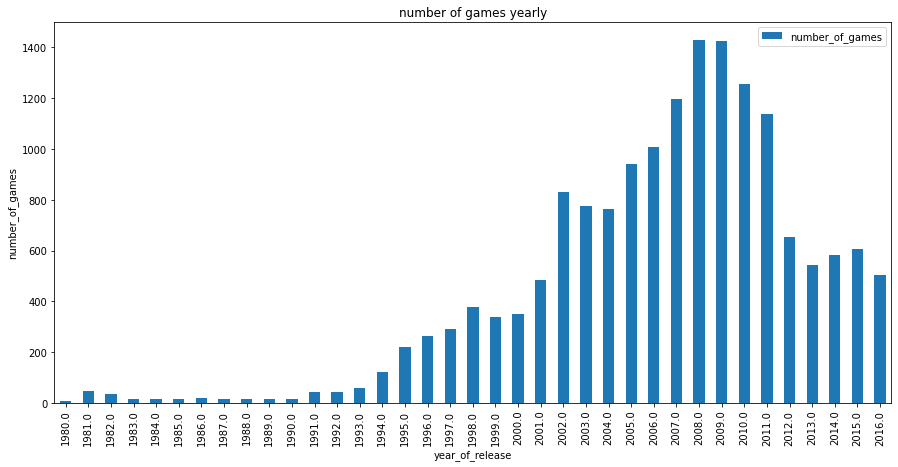

In [22]:
games_yearly.plot(kind='bar', figsize=(15, 7))
plt.ylabel('number_of_games')
plt.title('number of games yearly')
plt.show()

Больше всего игр было выпущено в 2008 - 2009 годах. До 1995 года игр выпускалось закономерно очень мало.

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Было бы здорово получить объяснение поведения данного графика (с точки зрения того, что происходило на рынке в соответствующие года). Пытаться понять полученный результат - важная часть работы аналитика.</div>


Рост продаж в 2008-2009 годах можно объяснить мировым кризисом: несмотря на него, игр выпускалось больше (возможно, выходило много низкобюджетных проектов) ввиду растущего спроса на видеоигры как на наиболее доступный вид досуга. Помимо этого, появились мощные гаджеты (смартфоны, к примеру), для которых также выпускались игры.

Времена меняются и с каждым годом игровая индустрия растет, меняется качество видеоигр и популярность различных жанров. Многие игры, жанры и платформы перестают быть популярными. То, что было популярно в конце прошлого века, теперь трогает лишь некоторых гиков. В начале нулевых появились качественно новые игры. Например, в 2002, вышла легендарная GTA:VC, в этот год как раз наблюдается скачок по количеству выпущенных игр. Предлагаю считать актуальный период с этого момента. Вопрос в том, брать ли в расчет данные за 2016 год, ведь данные этого года могут быь неполными. Посмотрим на наиболее популярные платформы за этот период.

In [23]:
actual_years = data[data['year_of_release'] >= 2002]
actual_platforms = actual_years.pivot_table(index='platform', values='name', aggfunc='count')
actual_platforms.columns = ['number_of_games']
actual_platforms.sort_values(by='number_of_games')

,number_of_games
platform,
N64,1
DC,3
PS,23
WiiU,147
XOne,247
PS4,392
PSV,429
3DS,512
GC,520


<a id='actual_years'></a>
В этом списке значительное количество непопулярных, "вымерших" на данный момент платформ. Посмотрим на популярные платформы с 2012 года, где видно сокращение выпущенных игр, что может говорить о смене концепции игр и популярности платформ. Сравним таблицы и выясним, какие платформы перестали быть популярными.

In [24]:
actual_years = data[data['year_of_release'] >= 2012]
actual_platforms = actual_years.pivot_table(index='platform', values='name', aggfunc='count')
actual_platforms.columns = ['number_of_games']
actual_platforms.sort_values(by='number_of_games')

,number_of_games
platform,
DS,31
Wii,54
WiiU,147
PSP,173
XOne,247
PC,250
X360,292
PS4,392
3DS,396


<a id='actual_platforms'></a>
Многие платформы за 10 лет перестали быть популярными, их вытеснили приставки по типу XBox и PlayStation, а также персональные компьютеры. Можно сделать вывод, что стоит рассматривать все платформы из таблицы выше, за исключением DS, Wii, WiiU, PSP.

In [25]:
tmp = (actual_platforms
       .pivot_table(index='platform', values='number_of_games', aggfunc= 'sum').sort_values('number_of_games', ascending=False)
      )
actual_years_platforms = actual_years.loc[actual_years['platform'].isin(tmp.index[:7].tolist())]
actual_years_platforms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16703,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16706,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16708,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Посмотрим на популярные игровые платформы по годам, учитывая количество выпущенных игр. <a id='popular_platforms'></a>

In [26]:
games_by_platform = actual_years_platforms.pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count')
games_by_platform.columns = ['number_of_games']
games_by_platform

number_of_games
year_of_release platform                 
2012.0          3DS                    93
                PC                     61
                PS3                   147
                PSV                    53
                X360                  106
2013.0          3DS                    91
                PC                     38
                PS3                   126
                PS4                    16
                PSV                    63
                X360                   75
                XOne                   19
2014.0          3DS                    80
                PC                     47
                PS3                   108
                PS4                    75
                PSV                   100
                X360                   63
                XOne                   61
2015.0          3DS                    86
                PC                     50
                PS3                    73
                PS4                   137
                PSV                   110
                X360                   35
                XOne                   80
2016.0          3DS                    46
                PC                     54
                PS3                    38
                PS4                   164
                PSV                    85
                X360                   13
                XOne                   87

In [1]:
sns.barplot(data=games_by_platform.reset_index(), x='year_of_release', y='number_of_games', hue='platform').set(title='popular game platforms 2012-2016')
sns.set(rc={'figure.figsize':(15,7)})
plt.legend(bbox_to_anchor=(1,1))
plt.show()

NameError: name 'sns' is not defined

Из графика выше можно сделать вывод, что популярность сильно теряет X360 и PS3, так как это уже устаревшее поколение приставок. В 2016 году также видно снижение количества выпускаемых игр для PSV и 3DS. Растут продажи игр на новое поколение приставок XOne и PS4, активно набирающих популярность, на бессмертный PC продажи прктически не меняются.

Посмотрим на продажи игр по платформам.

In [28]:
actual_platforms_sales = actual_years.pivot_table(index='platform', values='total_sales', aggfunc='sum')
actual_platforms_sales.sort_values(by='total_sales')

,total_sales
platform,
PSP,11.19
DS,12.55
Wii,35.37
PSV,49.18
PC,62.65
WiiU,82.19
XOne,159.32
3DS,194.61
X360,236.54


Это данные на период с 2012 года. Данные по продажам коррелируют с данными по количеству выпущенных игр. Единственное - продажи игр на платформе WiiU довольно велики, но, вероятно, это отголоски времен и популярность в японском регионе, платформа устаревает.

In [29]:
games_by_platform_sales = actual_years_platforms.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')

games_by_platform_sales

total_sales
year_of_release platform             
2012.0          3DS             51.36
                PC              23.22
                PS3            107.35
                PSV             16.19
                X360            99.74
2013.0          3DS             56.57
                PC              12.38
                PS3            113.25
                PS4             25.99
                PSV             10.59
                X360            88.58
                XOne            18.96
2014.0          3DS             43.76
                PC              13.28
                PS3             47.76
                PS4            100.00
                PSV             11.90
                X360            34.74
                XOne            54.07
2015.0          3DS             27.78
                PC               8.52
                PS3             16.82
                PS4            118.90
                PSV              6.25
                X360            11.96
                XOne            60.14
2016.0          3DS             15.14
                PC               5.25
                PS3              3.60
                PS4             69.25
                PSV              4.25
                X360             1.52
                XOne            26.15

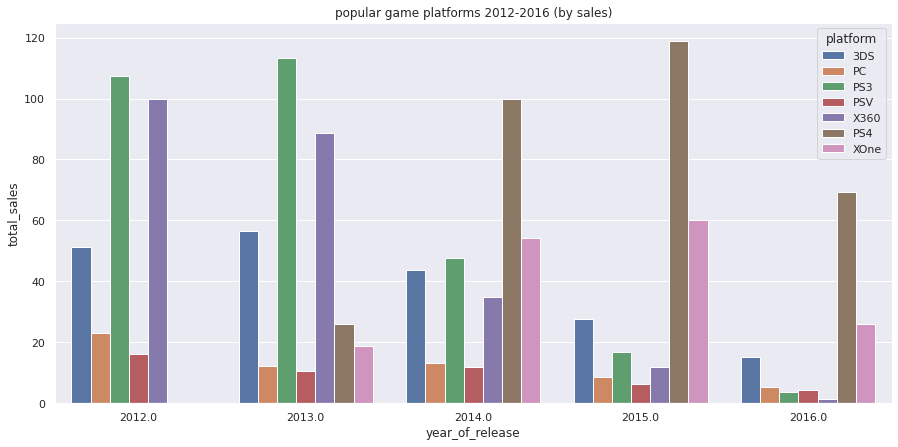

In [30]:
sns.barplot(data=games_by_platform_sales.reset_index(), x='year_of_release', y='total_sales', hue='platform').set(title='popular game platforms 2012-2016 (by sales)')
sns.set(rc={'figure.figsize':(15,7)})

Здесь не будем ориентироваться на 2016г, так как по сравнению с количеством выпущенных игр, продажи полностью сразу посчитать нельзя. Сильно теряют в продажах игры на 3DS, PS3, PSV, X360. Ставку точно стоит сделать на PS4 и XOne, не стоит также забывать про вечный PC, продажи игр для которого меняются не сильно.

Построим график "Ящик с усами", чтобы посмотреть продажи по платформам.

(0.0, 3.0)

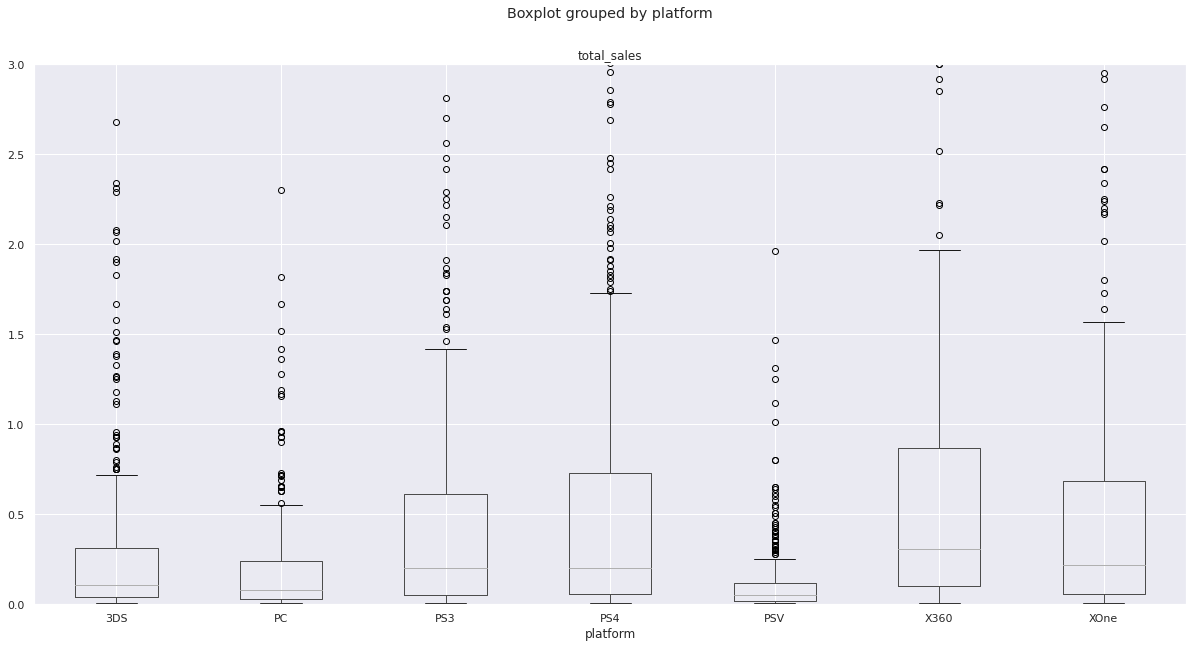

In [31]:
actual_years_platforms.boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.ylim(0, 3)    

Рассмотрим графики ближе:

(0.0, 0.85)

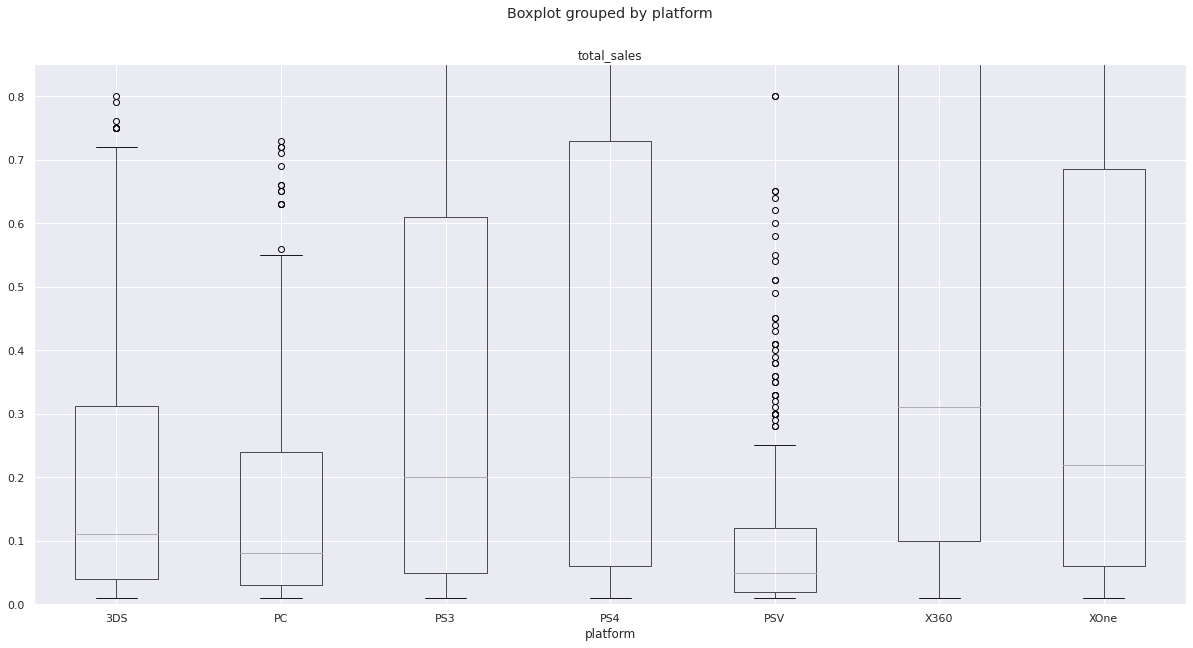

In [32]:
actual_years_platforms.boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.ylim(0, 0.85)    

Любопытно, что у двух приставок PS разных поколения (3 и 4) одинаковая медиана, но у PS4 как у набирающей популярность есть смещение в сторону верхнего квартиля.

Наибольшие продажи у X360, PS4, XOne и PS3. Наименьшие у PSV. В совокупности с прошлыми результатами, следует предположить, что в следующем году продажи будут расти у игр на PS4 и XOne, как у набирающих популярность платформ.

<a id='scores'></a>
Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между отзывами критиков и продажами: 0.406567902061781


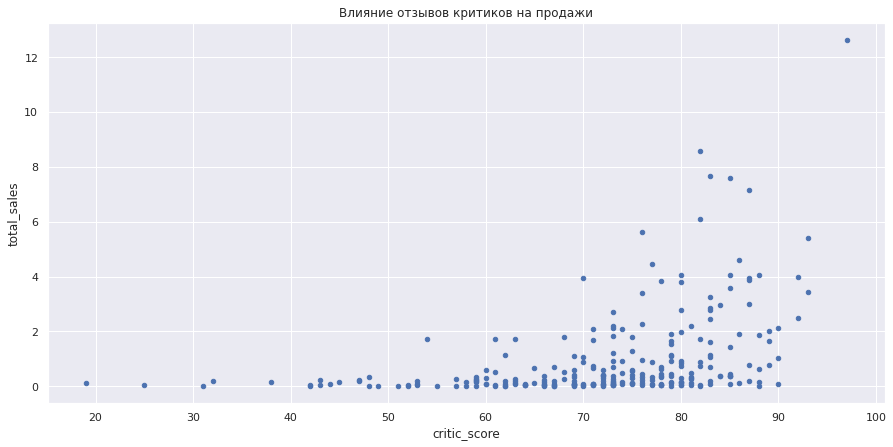

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между отзывами пользователей и продажами: -0.031957110204556376


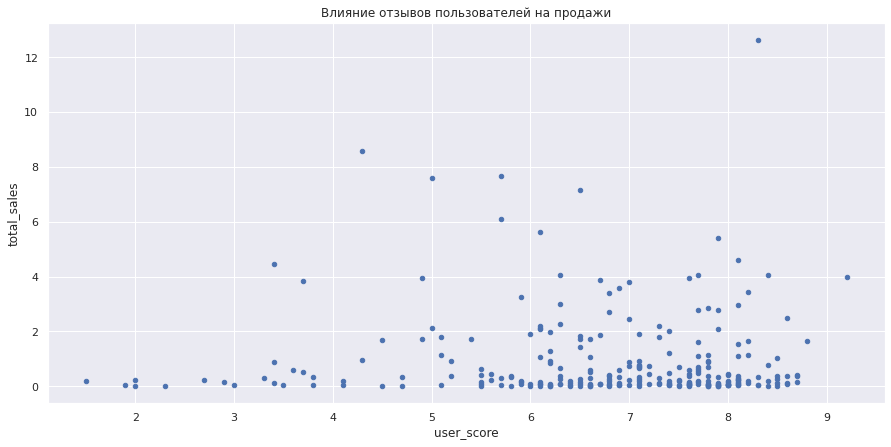

In [33]:
def dependence_plotter(platform):
    platform_data = actual_years[actual_years['platform'] == platform]

    print('Коэффициент корреляции между отзывами критиков и продажами:', platform_data['total_sales'].corr(platform_data['critic_score']))  
    platform_data.plot(x='critic_score', y='total_sales', kind='scatter') 
    plt.title('Влияние отзывов критиков на продажи')
    plt.show()
    print('Коэффициент корреляции между отзывами пользователей и продажами:',  platform_data['total_sales'].corr(platform_data['user_score']))  
    platform_data.plot(x='user_score', y='total_sales', kind='scatter') 
    plt.title('Влияние отзывов пользователей на продажи')
    plt.show()
    
dependence_plotter('PS4')

Наблюдается слабая зависимость между отзывами критиков и продажами, но это не говорит о том, что на количество продаж влияет оценка критиков. Зависимости между отзывами пользователей и продажами нет.

PS3:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между отзывами критиков и продажами: 0.3341517575509856


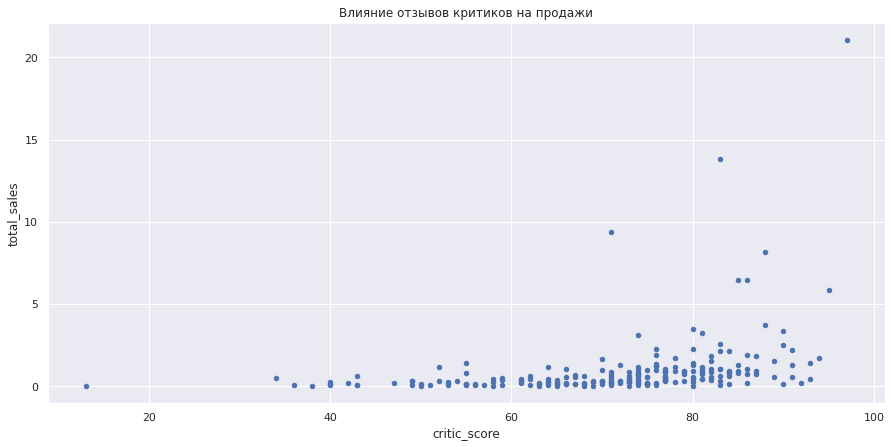

Коэффициент корреляции между отзывами пользователей и продажами: -0.006205767686051522


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


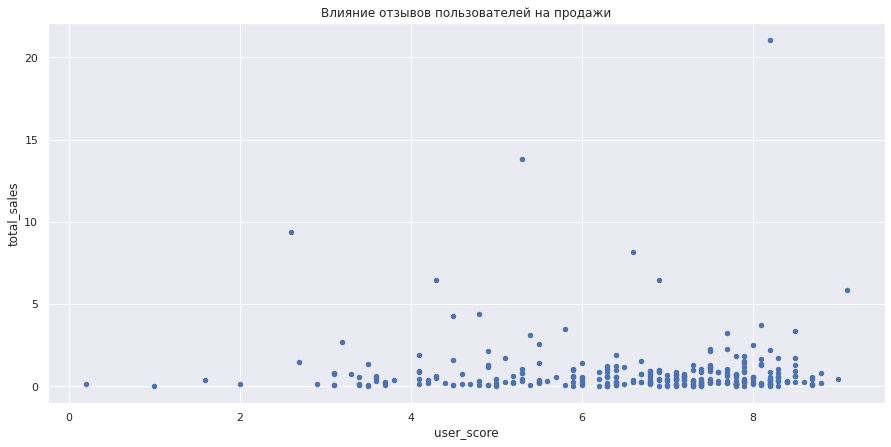

In [34]:
dependence_plotter('PS3')

X360:

Коэффициент корреляции между отзывами критиков и продажами: 0.36057348885073365


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


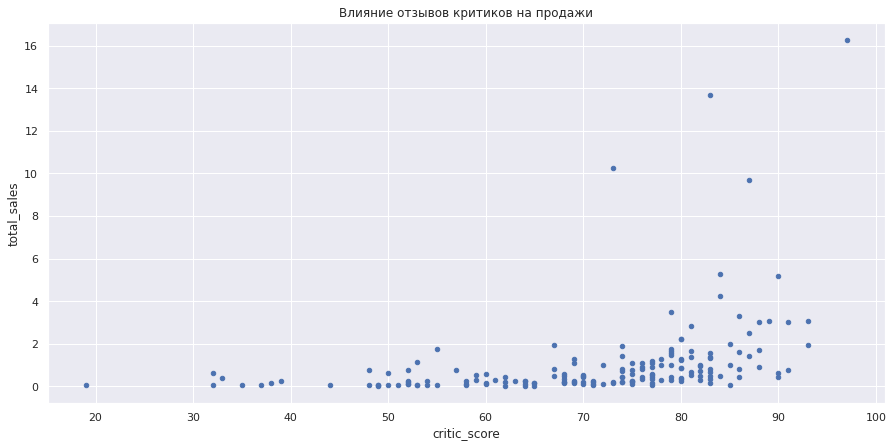

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между отзывами пользователей и продажами: 0.0061639786462133256


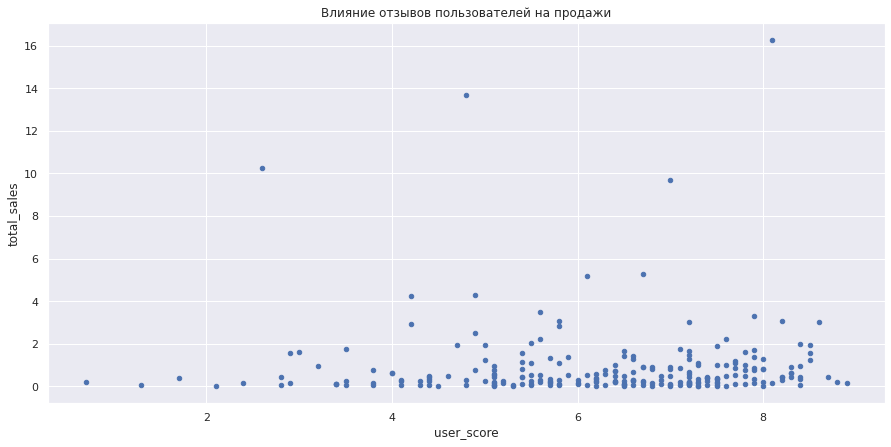

In [35]:
dependence_plotter('X360')

3DS:

Коэффициент корреляции между отзывами критиков и продажами: 0.32080286953607845


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


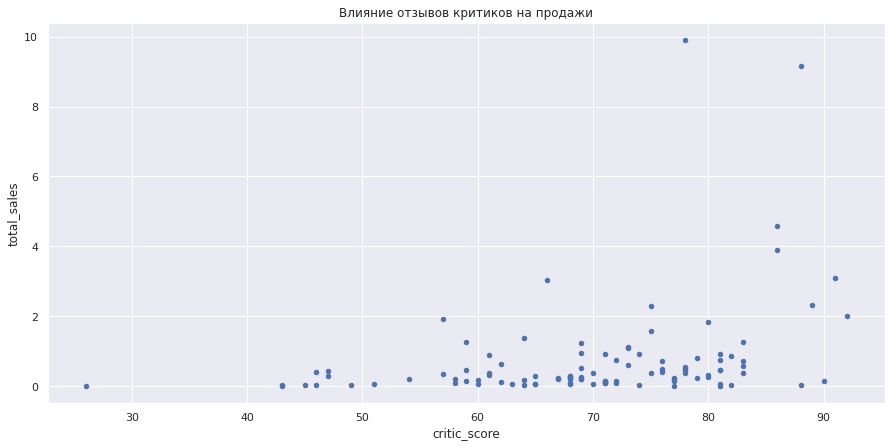

Коэффициент корреляции между отзывами пользователей и продажами: 0.19758263411038596


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


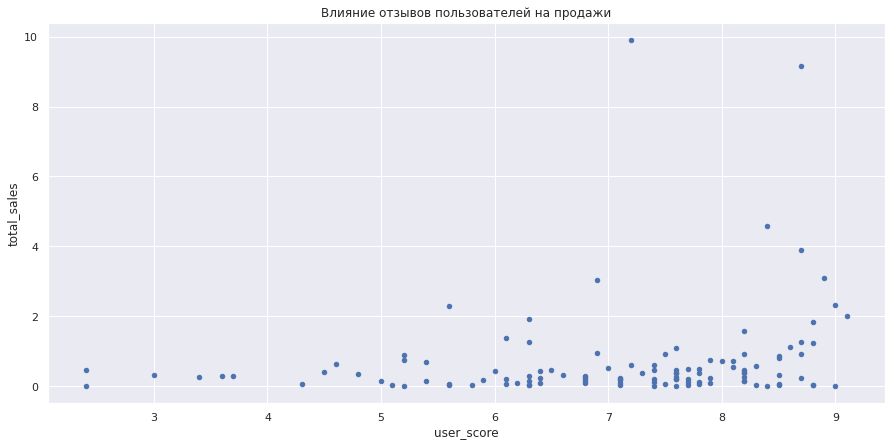

In [36]:
dependence_plotter('3DS')

На примере разных платформ убедились, что наблюдается слабая зависимость между отзывами критиков и продажами, зависимости между отзывами пользователей и продажами нет.

Определим наиболее популярные жанры игр:<a id='genres'></a>

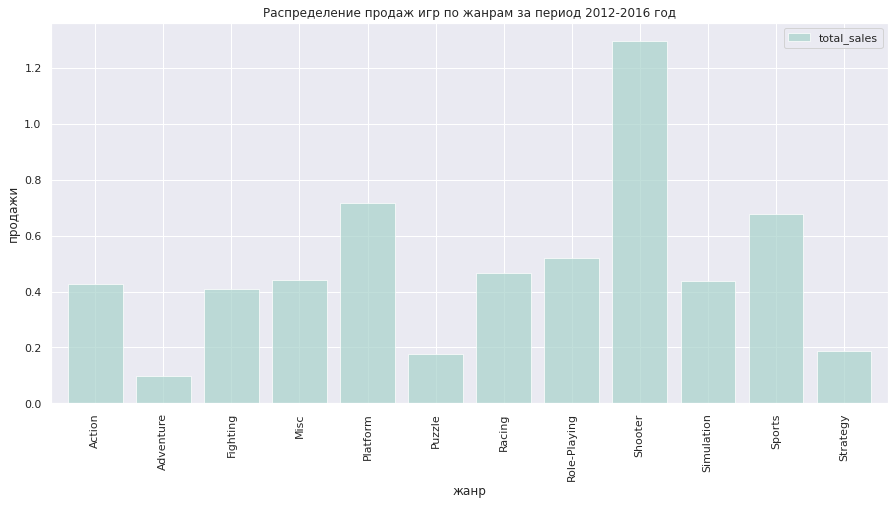

In [37]:
(actual_years
 .pivot_table(index='genre', values='total_sales', aggfunc='mean')
 .plot(kind='bar', figsize=(15, 7), color='#A7D2CB', width=0.8, alpha=0.7) 
)
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.title('Распределение продаж игр по жанрам за период 2012-2016 год')
plt.show()

Наиболее прибыльным жанром является экшен, наименее прибыльным - головоломки. Также среди прибыльных жанров закономерно выделяются шутеры, RPG и спортивные видеоигры.

Рассмотрев медианные значения продаж, избавившись от иллюзий из-за высокого количества продаж игр некоторых жанров, можно сделать вывод, что наиболее прибыльным жанром является шутер, наименее прибыльным - приключенческие игры. Также среди прибыльных жанров выделяются платформеры, RPG и спортивные видеоигры.

### Составим портрет пользователя каждого региона

**Топ-5 платформ для каждого региона по продажам игр для них:**<a id='region_platforms'></a>

Северная Америка:

<AxesSubplot:ylabel='na_sales'>

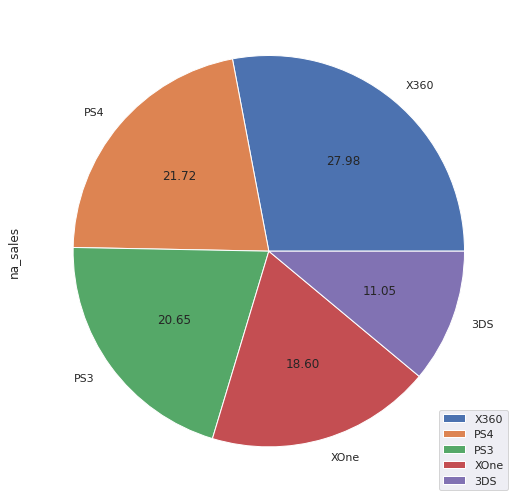

In [38]:
(
    actual_years.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(kind='pie', y='na_sales', figsize=(9,9), autopct="%.2f")
)

Европа:

<AxesSubplot:ylabel='eu_sales'>

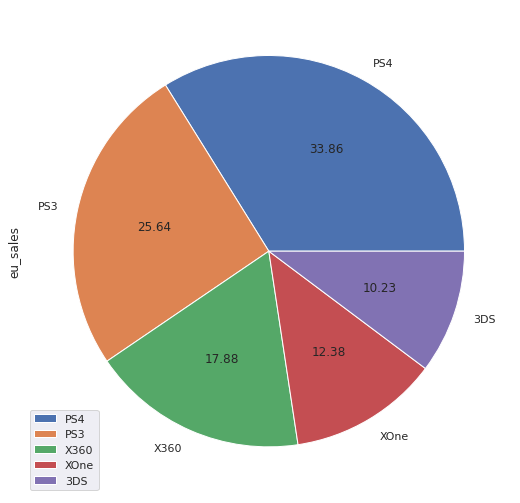

In [39]:
(
    actual_years
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(kind='pie', y='eu_sales', figsize=(9,9), autopct="%.2f")
)

Япония:

<AxesSubplot:ylabel='jp_sales'>

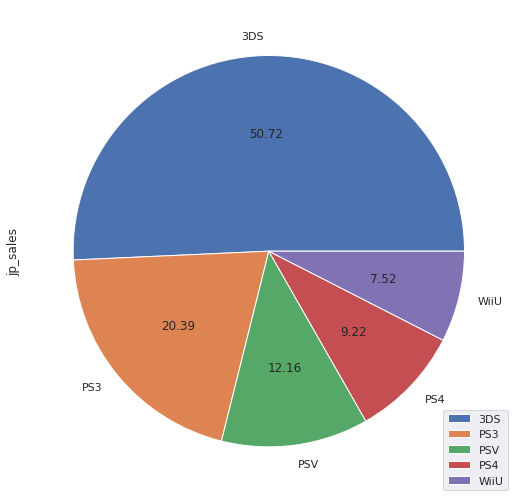

In [40]:
(
    actual_years
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(kind='pie', y='jp_sales', figsize=(9,9), autopct="%.2f")
)

В Европе и Северной Америке ситуация схожая, в топ-3 входят PS4, PS3 и X360, возможно, ввиду схожей культуры.

Японский регион выделяется: в топ-5 здесь входят приставки исключительно японских брендов, ввиду особенностей культуры в топе есть приставки, непопулярные в европейском и американском регионах, например, 3DS занимает первое место по продажам игр для нее.

**Топ-5 платформ для каждого региона по жанрам:** <a id='region_genres'></a>

Северная Америка:

<AxesSubplot:ylabel='na_sales'>

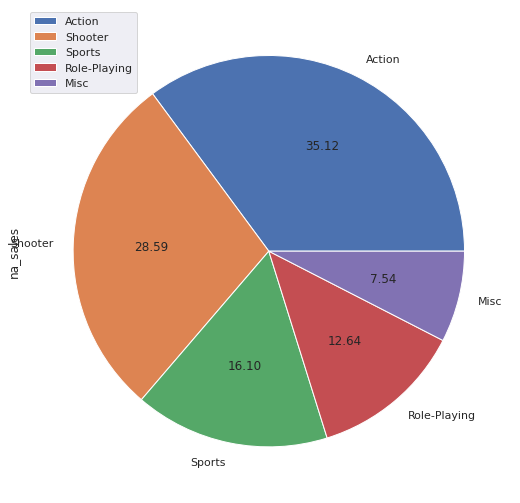

In [41]:
(
    actual_years.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(kind='pie', y='na_sales', figsize=(9,9), autopct="%.2f")
)

Европа:

<AxesSubplot:ylabel='eu_sales'>

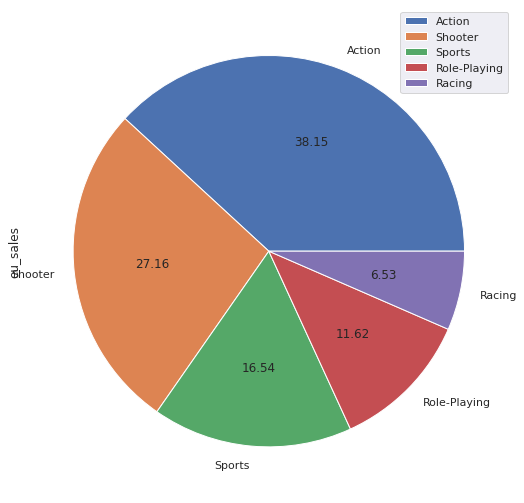

In [42]:
(
    actual_years.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(kind='pie', y='eu_sales', figsize=(9,9), autopct="%.2f")
)

Япония:

<AxesSubplot:ylabel='jp_sales'>

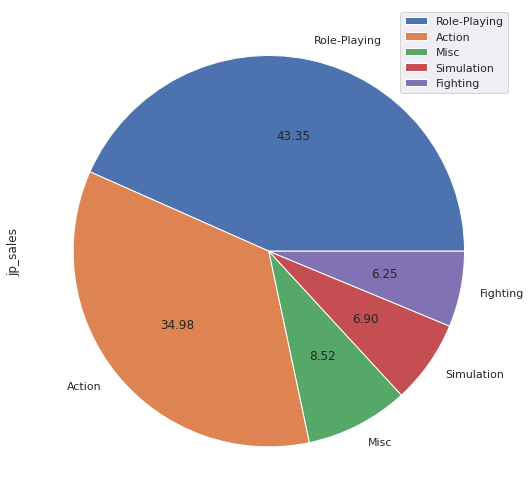

In [43]:
(
    actual_years.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(kind='pie', y='jp_sales', figsize=(9,9), autopct="%.2f")
)

И снова подтверждение, что Япония - другая планета. Если в европейском и американском регионе ситуация практически идентичная, за исключением 5го по популрности жанра (в Америке - аркады misc, в Европе - гонки), в Японии на первом месте RP игры, на втором - экшен, который не попал в топ для других регионов, как и симуляторы с файтингами.

**Посмотрим есть ли зависимость между рейтингом ESRB и продажами**<a id='rating'></a>

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым.<br><br>
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.<br><br>
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.<br><br>
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.<br><br>
Источник: wiki

Северная Америка:

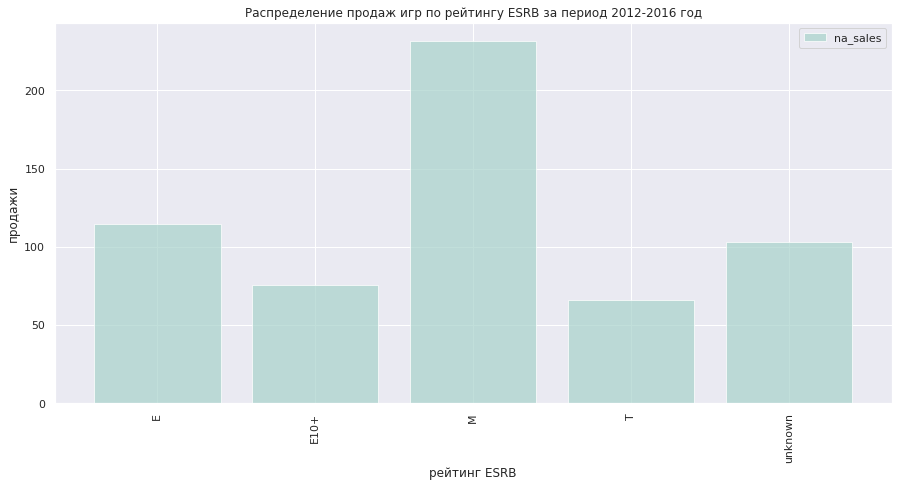

In [44]:
(
    actual_years.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15, 7), color='#A7D2CB', width=0.8, alpha=0.7)
)
plt.xlabel('рейтинг ESRB')
plt.ylabel('продажи')
plt.title('Распределение продаж игр по рейтингу ESRB за период 2012-2016 год')
plt.show()

Европа:

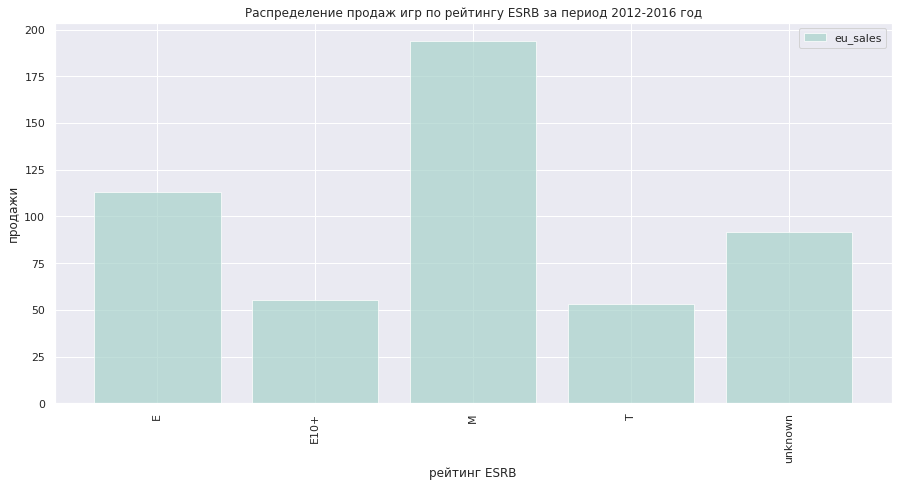

In [45]:
(
    actual_years.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15, 7), color='#A7D2CB', width=0.8, alpha=0.7)
)
plt.xlabel('рейтинг ESRB')
plt.ylabel('продажи')
plt.title('Распределение продаж игр по рейтингу ESRB за период 2012-2016 год')
plt.show()

Япония:

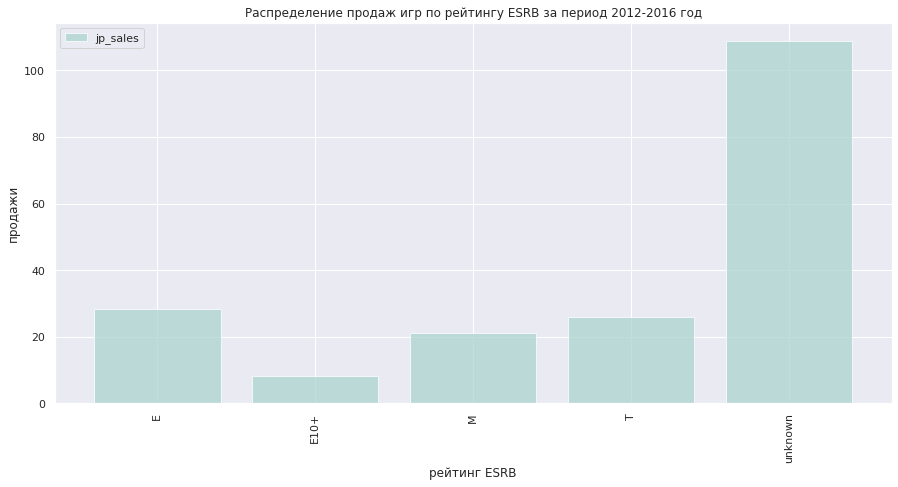

In [46]:
(
    actual_years.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15, 7), color='#A7D2CB', width=0.8, alpha=0.7)
)
plt.xlabel('рейтинг ESRB')
plt.ylabel('продажи')
plt.title('Распределение продаж игр по рейтингу ESRB за период 2012-2016 год')
plt.show()

Япония и тут отличается от всех. Вопреки ожиданиям и некоторым стереотипам, игры с рейтингом "M" здесь не так популярны, как в западных регионах (там игры с таким рейтингом самые популярные). С другой стороны, у нас нет данных по играм рейтинга "AO".<br> Если в американском и европейском регионах ситуация опять же идентичная: самые популярные игры - для взрослых, затем для всех, для всех от 10 и старше, для подростков, - то в японском регионе самые популярные - игры для всех, для подростков, для взрослых, затем для всех от 10 и старше.

Большую долю продаж занимают игры без рейтинга ESRB. Особенно это касается Японии. Возможно, в японском регионе очень много непопулярных игр какого-то эндемичного характера, для популярных только в этом регионе небольших приставок. Либо в данных решили не указывать рейтинг для игр определенной категории.


Помимо всего прочего, рейтинг ESRB - это американский рейтинг, а в Японии есть своё рейтинговое агентство (CERO). Известно, что у Японии свой менталитет. Анализ показывает, что Японцы в игры играют не такие, как весь прочий мир и жанры игр там популярны совсем другие, нежели в остальном мире, и на рейтинги (не своего агентства) не очень обращают внимание.

Можно сказать, что игры с рейтингом "M" лучше всего продаются в западных регионах, а игры с рейтингом "E" - в японском.

### Проверка гипотез

<a id='hyp_1'></a>
Первая нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC различаются. 
```
H_0: Пользовательский рейтинг (user_score) на платформе Xbox One = пользовательский рейтинг (user_score) на платформе PC
H_a: Пользовательский рейтинг (user_score) на платформе Xbox One ≠ пользовательский рейтинг (user_score) на платформе PC
alpha = 0.05
```

In [47]:
alpha = 0.05

results = st.ttest_ind(
    actual_years.loc[(actual_years['platform'] == 'XOne') & (actual_years['user_score'].notna()), 'user_score'], 
    actual_years.loc[(actual_years['platform'] == 'PC') & (actual_years['user_score'].notna()), 'user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Тест показал, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<a id='hyp_2'></a>
Вторая нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативная: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
```
H_0: Пользовательский рейтинг (user_score) жанра Action = пользовательский рейтинг (user_score) жанра Sports`
H_a: Пользовательский рейтинг (user_score) жанра Action ≠ пользовательский рейтинг (user_score) жанра Sports`
alpha = 0.05
```

In [48]:
alpha = 0.05

results = st.ttest_ind(
    actual_years.loc[(actual_years['genre'] == 'Action') & (actual_years['user_score'].notna()), 'user_score'], 
    actual_years.loc[(actual_years['genre'] == 'Sports') & (actual_years['user_score'].notna()), 'user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Тест показал, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез использовался t-критерий Стьюдента.

### Общий вывод

<a id='conclusions'></a>
В ходе первоначального исследования данных было выявлено, что столбцы critic_score, user_score и rating имеют большое количество пропусков. Обнаружилась общая закономерность в строках с пропущенными данными: пропуски в этих столбцах часто встречаются у слишком старых, слишком молодых и просто непопулярных игр. Стоит также отметить, что пропуски в столбцах могут быть вызваны ошибками в автоматическом сборе данных, либо человеческим фактором.

Информация в столбце "user_score" была переведена в числовой формат. Здесь было обнаружено значение "tbd", которое, судя по всему, означает "To Be Determined" и стоит у непопуярных на данный момент игр, оно было переведено в NaN.

Было обнаружено, что для многих игр отсутствует возрастной рейтинг. Для дальнейшего исследования таким играм присваивалось значение рейтинга "unknown".

Исследование показало, что больше всего игр было выпущено в 2008-2009 годах. Актуальный период определен с 2012 года, как определяющего смену тенденций развития игровой индустрии.

Исследование проводилось для наиболее популярных платформ за актуальный период: 3DS, PC, PS3, PS4, PSV, X360, XOne. Выяснилось, что наибольший рост продаж игр наблюдается для платформ PS4 и XOne. Изменения в продажах игр практически отсутствуют для PC, именно на эти платформы стоит обратить внимание в следующем году.

Было определено, что продажи слабо зависят от отзывов критиков, не зависят от отзывов пользователей.

Наиболее прибыльным жанром является шутер, наименее прибыльным - приключенческие игры. Также среди прибыльных жанров выделяются платформеры, RPG и спортивные видеоигры.

Типичный представитель североамериканского и европейского регионов: играет на X360/PS4/PS3 в экшены и шутеры.

Типичный представитель японского региона: играет на 3DS/PS3 в RP игры и экшены.

Игры с рейтингом "M" лучше всего продаются в западных регионах, а игры с рейтингом "E" - в японском.

Большую долю продаж занимают игры без рейтинга ESRB. Особенно это касается Японии. Возможно, в японском регионе очень много непопулярных игр какого-то эндемичного характера, для популярных только в этом регионе небольших приставок. Либо в данных не был указан рейтинг для игр определенной категории.


Были проверены некоторые гипотезы. Выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров экшен и спортивных игр разные.

<a id='recomms'></a>
Таким образом, в следующем году в западных регионах стоит делать ставку на игры жанров экшен и шутер на PS4 и XOne. В японском регионе на RP-игры и экшены для PS4/PS3, а также не забывать про 3DS.

<br>

[В начало](#start)